# Predicción de Demanda de Bicicletas con Regresión Lineal

En este ejemplo, usaremos el dataset **Bike Sharing Dataset** para predecir la demanda diaria de bicicletas
en función de variables como la estación del año, el clima, la temperatura y otros factores.

Dataset: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


In [9]:
import pandas as pd

# Cargar datos
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-aml-labs/master/data/daily-bike-share.csv"
df = pd.read_csv(url)
df.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Variables de registro 📝
- instant: Índice de registro único para cada fila.
- dteday: Fecha del registro, en formato AAAA-MM-DD.

Variables de tiempo y calendario 🗓️
- season: La estación del año (1: primavera, 2: verano, 3: otoño, 4: invierno).
- yr: El año de registro (0: 2011, 1: 2012).
- mnth: El mes de registro (1 a 12).
- holiday: Indica si el día es festivo o no (0: no, 1: sí).
- weekday: El día de la semana (0: domingo a 6: sábado).
- workingday: Indica si el día es laboral (0: no, 1: sí).

Variables climáticas ☁️
- weathersit: Las condiciones meteorológicas del día (1: despejado, 2: nublado, 3: lluvia/nieve ligera, 4: lluvia/nieve intensa).
- temp: La temperatura normalizada en grados Celsius.
- atemp: La sensación térmica normalizada en grados Celsius.
- hum: La humedad normalizada.
- windspeed: La velocidad del viento normalizada.

Variables de uso (objetivo) 🚲
- casual: El número de usuarios casuales que usaron el servicio.
- registered: El número de usuarios registrados que usaron el servicio.
- cnt: El total de usuarios (casual + registered). Esta es la variable principal a predecir.

In [11]:
# Preprocesamiento
# Definir las características (X) y la variable objetivo (y)
features = ["season", "year", "mnth", "holiday", "weekday", "workingday",
            "weathersit", "temp", "atemp", "hum", "windspeed"]

# Asignar las características a X y la variable objetivo a y
X = df[features]
y = df["rentals"]

**¿Qué es el One-Hot Encoding?**

El One-Hot Encoding es una técnica que transforma variables categóricas (como "temporada" o "día de la semana") en un formato numérico que los algoritmos de machine learning pueden procesar. La mayoría de los modelos, incluyendo la regresión lineal, no pueden trabajar directamente con datos de texto o números que representan categorías de forma ordinal (por ejemplo, pensar que "verano" es mayor que "primavera").

In [12]:
# One-Hot Encoding de variables categóricas
X = pd.get_dummies(X, columns=["season", "mnth", "weekday", "weathersit"], drop_first=True)

X.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,2011,0,0,0.344167,0.363625,0.805833,0.160446,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,2011,0,0,0.363478,0.353739,0.696087,0.248539,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2011,0,1,0.196364,0.189405,0.437273,0.248309,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,0,1,0.200000,0.212122,0.590435,0.160296,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2011,0,1,0.226957,0.229270,0.436957,0.186900,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((584, 29), (147, 29))

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 250.12
RMSE : 337.82
R²   : 0.7071


**Conclusiones de las métricas**

* MAE (Error Absoluto Medio): 250.12
Esto significa que, en promedio, las predicciones de tu modelo están desviadas del valor real en aproximadamente 250 bicicletas. Es una medida del error promedio en unidades absolutas, lo que te da una idea del tamaño típico de las predicciones incorrectas.

* RMSE (Raíz del Error Cuadrático Medio): 337.82
Este valor es la desviación estándar de los residuos (los errores). El RMSE es más sensible a los errores grandes, lo que explica que su valor sea mayor que el MAE. Un RMSE de 337.82 bicicletas sugiere que la dispersión de los errores alrededor de la media es considerable.

* (R-cuadrado): 0.7071
Este es un indicador clave del rendimiento del modelo. Un valor de 0.7071, o 70.71%, significa que aproximadamente el 71% de la variabilidad en el número total de bicicletas alquiladas (cnt) puede ser explicada por las variables de tu modelo. Un valor de R2 superior a 0.70 generalmente se considera bueno, lo que sugiere que las características que utilizaste son efectivas para predecir el alquiler de bicicletas.

# **Resumen**
Tu modelo de regresión lineal es útil, ya que explica más del 70% de la variabilidad en los datos. Sin embargo, el error promedio (MAE y RMSE) sigue siendo bastante alto, superando las 250 bicicletas. Esto indica que aunque el modelo capta la tendencia general, todavía tiene dificultades para predecir con precisión los valores exactos. Podrías considerar explorar técnicas más avanzadas para mejorar el rendimiento, como usar un modelo diferente (por ejemplo, RandomForestRegressor), o incorporar más variables al modelo que puedan explicar el 29% restante de la variabilidad.

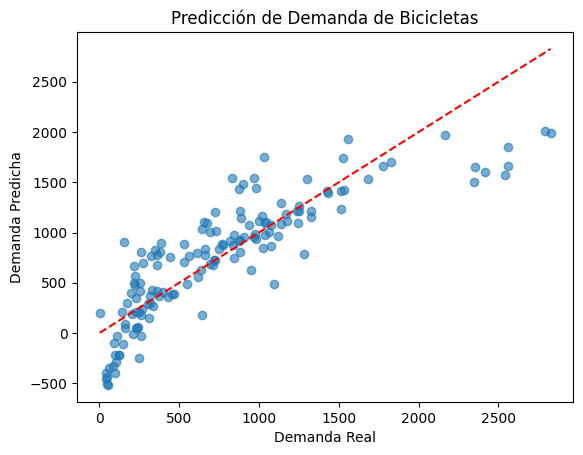

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Demanda Real")
plt.ylabel("Demanda Predicha")
plt.title("Predicción de Demanda de Bicicletas")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

* Relación positiva y clara: Existe una fuerte correlación positiva entre la demanda real y la demanda predicha por tu modelo. La mayoría de los puntos se agrupan a lo largo de la línea discontinua, que representa una predicción perfecta (donde la predicción es igual al valor real). Esto es una señal muy buena y confirma que tu modelo es capaz de capturar la tendencia general de la demanda.

* Ajuste del modelo: El modelo parece tener un buen ajuste para el rango de demanda entre 500 y 1500 bicicletas, donde los puntos están muy cerca de la línea ideal.

* Errores y dispersión en los extremos: Sin embargo, la dispersión de los puntos aumenta significativamente en los extremos, especialmente en los valores de demanda más altos (superiores a 2000). Esto indica que el modelo tiene mayor dificultad para predecir correctamente la demanda en días de alta popularidad, cometiendo errores más grandes. Los puntos que están muy por debajo de la línea indican que el modelo subestima la demanda real, y los que están por encima (aunque son menos) sugieren que la sobreestima.

* Predicciones negativas: La presencia de predicciones negativas (los puntos que caen en el área por debajo del eje X) es un problema. En este contexto, una demanda negativa de bicicletas no tiene sentido físico. Esto es una limitación de la regresión lineal, que a veces predice valores fuera de un rango lógico.

# **Resumen**

El modelo es útil y tiene un buen rendimiento general, como lo indicaban tus métricas R^2. Sin embargo, es menos preciso en los días de mayor demanda y produce predicciones ilógicas (negativas) en el extremo inferior. Para mejorar el modelo, podrías considerar técnicas que eviten las predicciones negativas, como un modelo de regresión de Poisson para conteos, o usar modelos más robustos como los árboles de decisión, que a menudo manejan mejor los extremos.